In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [3]:
print("No of Row and No of Column rep : ",df.shape)
print()
df.info()

No of Row and No of Column rep :  (10841, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Checking Missing Values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
# Handling missing values
df = df.dropna().reset_index(drop = True)

In [6]:
# Q1. Unique Category of app and count 
Category_list = df['Category'].unique()
Category_list

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [191]:
df.groupby('Category').count()['App']

Category
ART_AND_DESIGN           61
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     178
BUSINESS                303
COMICS                   58
COMMUNICATION           328
DATING                  195
EDUCATION               155
ENTERTAINMENT           149
EVENTS                   45
FAMILY                 1746
FINANCE                 323
FOOD_AND_DRINK          109
GAME                   1097
HEALTH_AND_FITNESS      297
HOUSE_AND_HOME           76
LIBRARIES_AND_DEMO       64
LIFESTYLE               314
MAPS_AND_NAVIGATION     124
MEDICAL                 350
NEWS_AND_MAGAZINES      233
PARENTING                50
PERSONALIZATION         312
PHOTOGRAPHY             317
PRODUCTIVITY            351
SHOPPING                238
SOCIAL                  259
SPORTS                  319
TOOLS                   733
TRAVEL_AND_LOCAL        226
VIDEO_PLAYERS           160
WEATHER                  75
Name: App, dtype: int64

In [8]:
# Q2 Content Rating list
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [9]:
# Q3. How many app are there with rating 5?
len(df[df['Rating'] == 5.0])

274

In [10]:
# Q4. How many app are belong to family category and have more than 4 Rating?
df_family = df[df['Category'] == 'FAMILY']
len(df_family[df_family['Rating'] > 3 ])

1682

In [11]:
# Q5. How many app are belong to family category and have more than 4 Rating and  free?
df_family = df[df['Category'] == 'FAMILY']
df_fr = df_family[df_family['Rating'] > 3 ]
len(df_fr[df_fr['Type']  == 'Free'])

1529

### Data Visualizations

In [172]:
plt.style.use('fivethirtyeight')

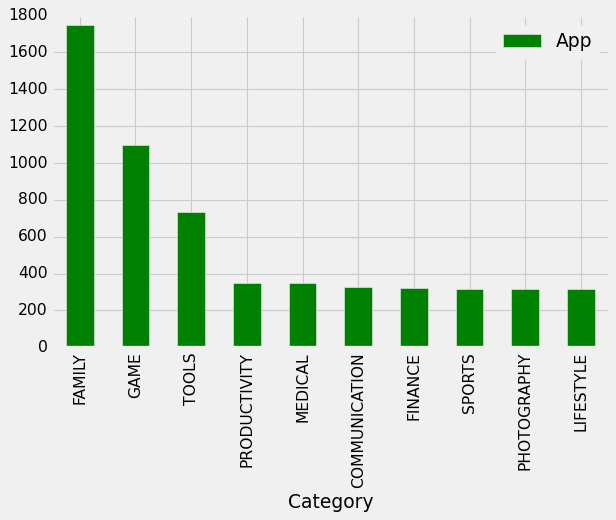

In [186]:
# Number of app in Category
plt.figure(figsize = (8,5))
df.groupby('Category').count()['App'].sort_values(ascending= False).head(10).plot(kind = 'bar',color = 'g',legend = True)
plt.show()

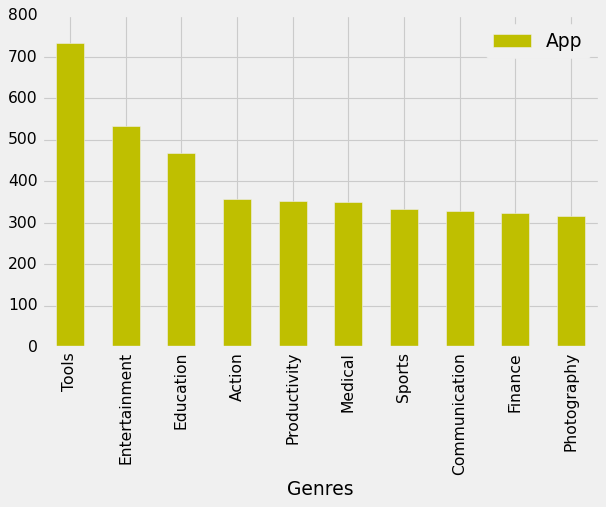

In [185]:
plt.figure(figsize = (8,5))
df.groupby('Genres').count()['App'].sort_values(ascending= False).head(10).plot(kind = 'bar', width = 0.5,color = 'y',grid = True,legend = True)
plt.show()

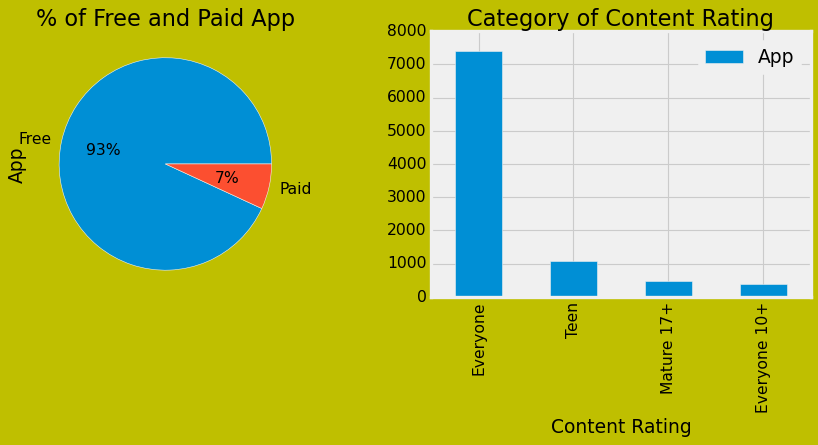

In [184]:
plt.figure(figsize = (12,4),facecolor='y')
plt.subplot(1,2,1)
df.groupby('Type').count()['App'].sort_values(ascending= False).plot(kind = 'pie',autopct='%.0f%%')
plt.title('% of Free and Paid App')


plt.subplot(1,2,2)
df.groupby('Content Rating').count()['App'].sort_values(ascending= False).head(4).plot(kind = 'bar',grid = True,legend = True)
plt.title('Category of Content Rating')
plt.show()